# Statical analysis for the customization process.
A cvs file was created to contain the Id of the particpant, the customization options and how much time each particpant spent on each customization option. This data had two groups the first group used one platform for their avatar customization and the other group used two platforms for their avatar customization. The following steps were used to analyze this data:

1. Create a CVS file on Excel.
2. Make sure the time format are correct.
3. Clean the data by handling empty rows by and columns.
 . The "NC", "X", "None" and "Default" were converted to timedelta because timedelta objects allows us to handle missing or invalid time values such as "None," "NC," "X," or "Default" more efficiently. Missing or invalid time values were represented using pandas' NaT (Not-a-Time) special value, which makes it easier to handle such cases during calculations.
4. Use Pandas to read the file
5. Convert time columns to timedelta *Timedelta objects represent a duration between two points in time and allow us to perform arithmetic operations like addition, subtraction, and average calculations on time durations.
6. Separate the data for participants who used one platform and two platforms
7. Calculte the descriptive ststistics for the time spent on each customization option. such as mean, max, median.
8. Calculate mean time spent on each customization option by each group
9. Calculate maximum time spent on each customization option by each group
10. Perform t-test to compare time spent on customization options between the two groups(The group that used one platfrom and the group that used two platforms).
 . The t-test was done on the data to compare the time spent on each customization option between two groups of participants: those who used one platform and those who used two platforms. The purpose of the t-test was to determine if there is a statistically significant difference in the time spent on customization options between these two groups.
11. Convert timedelta values to numeric (total seconds) for plotting.
12. Plot the bar chart for mean time spent on each customization option by each group.
13. Display the t-test results The code and result are present below.

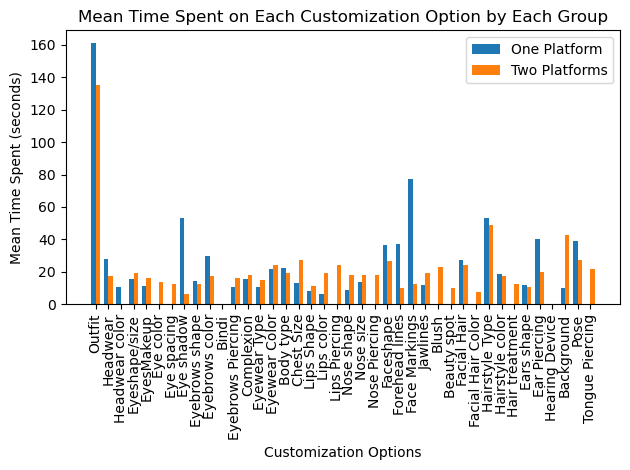

Max time spent on each customization option by each group:
One Platform:
Outfit               0 days 00:08:59
Headwear             0 days 00:00:52
Headwear color       0 days 00:00:16
Eyeshape/size        0 days 00:00:23
EyesMakeup           0 days 00:00:23
Eye color                        NaT
Eye spacing                      NaT
Eye shadow           0 days 00:01:18
Eyebrows shape       0 days 00:00:22
Eyebrows color       0 days 00:00:39
Bindi                            NaT
Eyebrows Piercing    0 days 00:00:20
Complexion           0 days 00:00:25
Eyewear Type         0 days 00:00:11
Eyewear Color        0 days 00:00:30
Body type            0 days 00:00:39
Chest Size           0 days 00:00:19
Lips Shape           0 days 00:00:08
Lips color           0 days 00:00:08
Lips Piercing                    NaT
Nose shape           0 days 00:00:09
Nose size            0 days 00:00:28
Nose Piercing                    NaT
Faceshape            0 days 00:01:32
Forehead lines       0 days 00:00:37
Fa

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Function to convert time strings to timedelta
def str_to_timedelta(time_str):
    if time_str in ['None', 'NC', 'Default', 'X']:
        return pd.NaT
    try:
        return pd.to_timedelta(time_str)
    except ValueError:
        return pd.NaT

# Load the CSV file into a DataFrame
file_name = "CustomizationD.csv"
df = pd.read_csv(file_name, delimiter=',')

# Convert time columns to timedelta
time_columns = df.columns[2:]
for col in time_columns:
    df[col] = df[col].apply(str_to_timedelta)

# Separate the data for participants who used one platform and two platforms
one_platform_data = df[df['Number of Platforms'] == 1].drop('Number of Platforms', axis=1)
two_platforms_data = df[df['Number of Platforms'] == 2].drop('Number of Platforms', axis=1)

# Calculate mean time spent on each customization option by each group
one_platform_mean = one_platform_data[time_columns].mean(numeric_only=False) # numeric_only=False to include timedelta
two_platforms_mean = two_platforms_data[time_columns].mean(numeric_only=False) # columns in the mean calculation

# Calculate maximum time spent on each customization option by each group
one_platform_max = one_platform_data[time_columns].max()
two_platforms_max = two_platforms_data[time_columns].max()

# Perform t-test to compare time spent on customization options between the two groups
t_test_results = pd.DataFrame(index=time_columns, columns=['t-statistic', 'p-value'])
for col in time_columns:
    one_platform_values = one_platform_data[col].fillna(pd.Timedelta(seconds=0))
    two_platforms_values = two_platforms_data[col].fillna(pd.Timedelta(seconds=0))
    
    # Perform the t-test with equal_var=False for Welch's t-test
    t_stat, p_val = ttest_ind(one_platform_values.dt.total_seconds(), two_platforms_values.dt.total_seconds(), 
                              equal_var=False, nan_policy='omit')
    t_test_results.loc[col, 't-statistic'] = t_stat
    t_test_results.loc[col, 'p-value'] = p_val
    
# Calculate Cohen's d for each customization option
pooled_std = np.sqrt(((len(one_platform_values) - 1) * one_platform_values.dt.total_seconds().var() + 
                      (len(two_platforms_values) - 1) * two_platforms_values.dt.total_seconds().var()) / 
                     (len(one_platform_values) + len(two_platforms_values) - 2))

# Check if pooled_std is zero, in which case Cohen's d is undefined, and set it to NaN
if pooled_std == 0:
    cohen_d = np.nan
else:
    cohen_d = (one_platform_values.mean().total_seconds() - two_platforms_values.mean().total_seconds()) / pooled_std

# Add Cohen's d values to the t-test results DataFrame
t_test_results['Cohen\'s d'] = cohen_d


# Add Cohen's d values to the t-test results DataFrame
t_test_results['Cohen\'s d'] = cohen_d

# Convert timedelta values to numeric (total seconds) for plotting
one_platform_mean = one_platform_mean.fillna(pd.Timedelta(seconds=0)).dt.total_seconds()
two_platforms_mean = two_platforms_mean.fillna(pd.Timedelta(seconds=0)).dt.total_seconds()

# Plot the bar chart for mean time spent on each customization option by each group
x = np.arange(len(time_columns))
width = 0.35
plt.bar(x - width/2, one_platform_mean.values, width, label='One Platform')
plt.bar(x + width/2, two_platforms_mean.values, width, label='Two Platforms')
plt.xticks(x, time_columns, rotation=90)
plt.xlabel('Customization Options')
plt.ylabel('Mean Time Spent (seconds)')
plt.legend()
plt.title('Mean Time Spent on Each Customization Option by Each Group')
plt.tight_layout()
plt.show()

# Display the maximum time spent on each customization option by each group
print("Max time spent on each customization option by each group:")
print("One Platform:")
print(one_platform_max)
print("\nTwo Platforms:")
print(two_platforms_max)

# Display the mean time spent on each customization option by each group
print("\nMean time spent on each customization option by each group:")
print("One Platform:")
print(one_platform_mean)
print("\nTwo Platforms:")
print(two_platforms_mean)


# Display the t-test results with Cohen's d
print("\nT-Test Results with Cohen's d:")
print(t_test_results[['t-statistic', 'p-value', 'Cohen\'s d']])

# Ease of use.
In terms of the ease of use, the participants were asked in the first survey how proficient they were with computers and in the second survey how easy it was for them to use the interface provided on social media to customize an avatar of themselves. 
Using python programming language the first step was to import two libraries, ‘pandas’ (as ‘pd’) and ‘matplotlib.pyplot’ (as ‘plt’), which are essential for data manipulation and visualization. Then, a dictionary named ‘data’ was defined containing sample data with three key-value pairs: “Participant”, “Computer Usage” and “App Ease”. This dictionary simulates data about participants, their computer usage skills, and app ease levels. 
•	The data sample dictionary is used to create a DataFrame named ‘df’ using the ‘pd.DataFrame()’ function from the ‘pandas’ library. 
•	A function was then defined named ‘count_combinations’ that takes three arguments: the DataFrame(‘df’), a specific “Computer Usage” values, and a specific “App Ease” values. It calculates and returns the count of rows in the DataFrame that match both the given “Computer Usage” and “App Ease” values.

•	Then ’count_combination’ is called six times with different combinations of “Computer Usage” and “App Ease” values. It calculates the counts for distinct combinations that encompassed various levels of “Computer Usage” paired with different perceived level of “App Ease.” The counts were calculated for the following combinations: “beginner” and “so easy”, “beginner” and “not so easy”, “beginner” and “hard”, “average” and “so easy”, “average” and “not so easy”, “average” and “hard”, “excellent” and “so easy”, “excellent” and “not so easy” and “excellent” and “hard”.
•	Labels and sizes for creating a pie chart were then defined. Plt.figure() was used to specify the size of the pie chart, then ‘plt.pie()’is used to create the pie chart itself. 
•	The ‘sizes’ list provides the data for each slice, and the ‘labels’ list is used for labeling each slice. The ‘autopct’ parameter adds percentage labels to each slice, and ‘startangle’ sets the starting angle it a perfect circle. ‘plt.axis(“equal”)’ ensures that the pie chart is displayed with equal aspect ratio, making it a perfect circle, ‘plt.title()’ was used to set title of the pie chart and then ‘plt.show()’ is used to display the pie chart. 


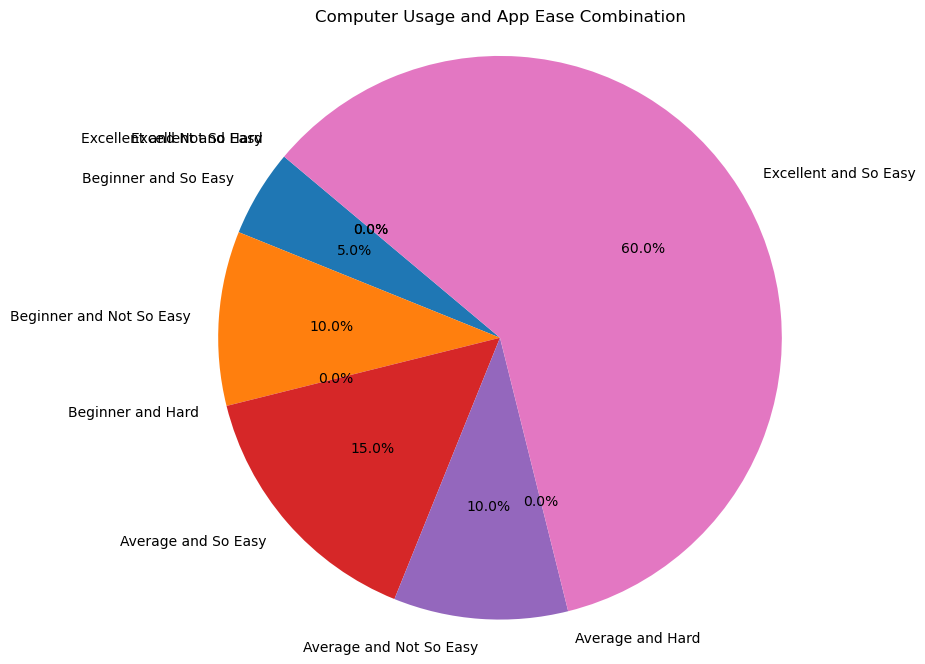

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data as a dictionary
data = {
    "Participant": range(1, 21),
    "Computer Usage": [
        "excellent",
        "excellent",
        "excellent",
        "beginner",
        "excellent",
        "excellent",
        "beginner",
        "excellent",
        "average",
        "average",
        "beginner",
        "average",
        "average",
        "average",
        "excellent",
        "excellent",
        "excellent",
        "excellent",
        "excellent",
        "excellent",
    ],
    "App Ease": [
        "so easy",
        "so easy",
        "so easy",
        "not so easy",
        "so easy",
        "so easy",
        "not so easy",
        "so easy",
        "not so easy",
        "so easy",
        "so easy",
        "not so easy",
        "so easy",
        "so easy",
        "so easy",
        "so easy",
        "so easy",
        "so easy",
        "so easy",
        "so easy",
    ],
}

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Function to count the combinations
def count_combinations(df, computer_usage, app_ease):
    return len(df[(df["Computer Usage"] == computer_usage) & (df["App Ease"] == app_ease)])

# Count the combinations
beginner_so_easy = count_combinations(df, "beginner", "so easy")
beginner_not_so_easy = count_combinations(df, "beginner", "not so easy")
beginner_hard = 0  # No participant chose "beginner" and "hard"

average_so_easy = count_combinations(df, "average", "so easy")
average_not_so_easy = count_combinations(df, "average", "not so easy")
average_hard = 0  # No participant chose "average" and "hard"

excellent_so_easy = count_combinations(df, "excellent", "so easy")
excellent_not_so_easy = count_combinations(df, "excellent", "not so easy")
excellent_hard = 0  # No participant chose "excellent" and "hard"

# Pie chart data
labels = [
    "Beginner and So Easy", "Beginner and Not So Easy", "Beginner and Hard",
    "Average and So Easy", "Average and Not So Easy", "Average and Hard",
    "Excellent and So Easy", "Excellent and Not So Easy", "Excellent and Hard"
]
sizes = [
    beginner_so_easy,
    beginner_not_so_easy,
    beginner_hard,
    average_so_easy,
    average_not_so_easy,
    average_hard,
    excellent_so_easy,
    excellent_not_so_easy,
    excellent_hard,
]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140)
plt.axis("equal")

# Display the pie chart
plt.title("Computer Usage and App Ease Combination")
plt.show()


# User Avatar type preference

After record of the user avatar preference was taken, Python programming with Pandas and Matplotlib libraries were used to analyze and visualize participants’ preferences for different types of avatars. The information of 120 participants and their avatar preferences was entered into a CSV file. In order to find out the user avatar preference:
•	The first step was reading the CSV file using Pandas to create a DataFrame. To ensure consistency and eliminate potential discrepancies, the avatar type values were standardized by removing leading and trailing spaces, and by converting all values to lower case.
•	A predefined list of seven distinct avatar types, including “cartoon avatar”, “personalized avatar”, ‘realistic avatar”, “iconic avatar”, “robot avatar”, “animal avatar”, and “fantasy avatar”, was established to represent the range of avatar preferences.
•	A dictionary was initialized to keep track of the count of each avatar type. The DataFrame rows were iterated through to extract the preferred avatar type of each participant. If the avatar type was found in the predefined list, its count in the dictionary was incremented.
•	The count of participant who preferred each avatar type was printed in order to verify the accuracy of the of the count before proceeding to plot the bar chart.
•	A bar was generated   using Matplotlib library, to visually represent the preferences for different avatar types. The x-axis of the chart displayed the avatar types, while the y-axis indicated the count of the participant who chose each type.


Avatar Type Preferences (Counts):
cartoon avatar: 1
personalized avatar: 8
realistic avatar: 50
iconic avatar: 0
robotic avatar: 3
animal avatar: 14
fantasy avatar: 44


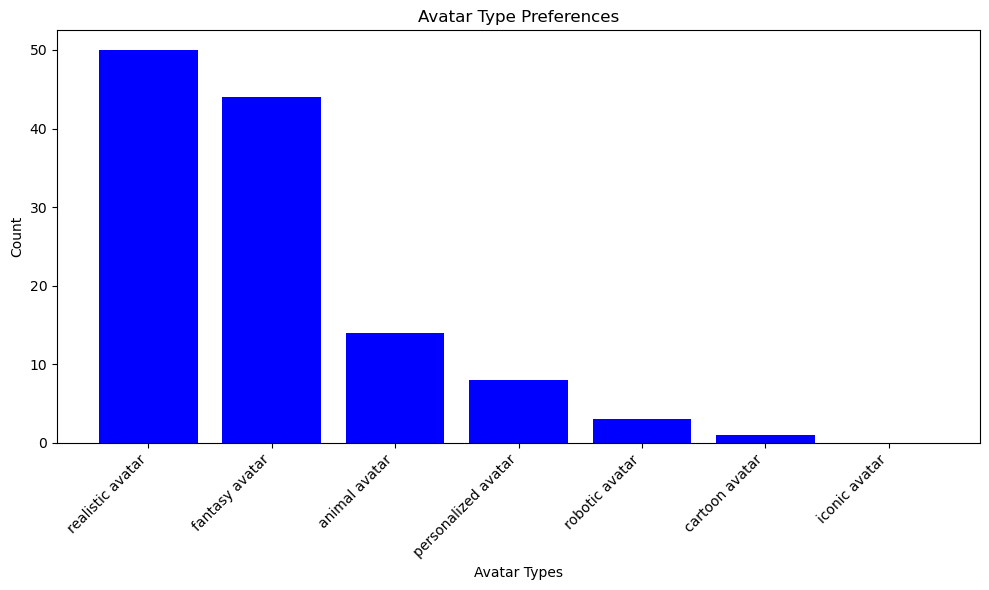

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
file_name = "most.csv"
df = pd.read_csv(file_name)

# Clean and standardize avatar type values
df['Preferred Avatar Type'] = df['Preferred Avatar Type'].str.strip().str.lower()
df['Preferred Avatar Type'] = df['Preferred Avatar Type'].str.replace('  ', ' ').str.replace('  ', ' ').str.replace('  ', ' ')

# Create a DataFrame for all avatar types
all_avatar_types = ["cartoon avatar", "personalized avatar", "realistic avatar", "iconic avatar", "robotic avatar", "animal avatar", "fantasy avatar"]

# Initialize a dictionary to store counts for each avatar type
avatar_counts = {avatar_type: 0 for avatar_type in all_avatar_types}

# Count the occurrences of each avatar type
for index, row in df.iterrows():
    avatar_type = row['Preferred Avatar Type']
    if avatar_type in avatar_counts:
        avatar_counts[avatar_type] += 1

# Print the counts for each avatar type
print("Avatar Type Preferences (Counts):")
for avatar_type, count in avatar_counts.items():
    print(f"{avatar_type}: {count}")

# Convert the dictionary to a DataFrame
avatar_counts_df = pd.DataFrame({'Avatar Type': all_avatar_types, 'Count': list(avatar_counts.values())})

# Sort the avatar types based on count (descending order)
sorted_avatar_counts_df = avatar_counts_df.sort_values(by='Count', ascending=False)

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_avatar_counts_df['Avatar Type'], sorted_avatar_counts_df['Count'], color='blue')
plt.xlabel('Avatar Types')
plt.ylabel('Count')
plt.title('Avatar Type Preferences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the counts before the graph
plt.show()


# User gender preference

In order to know user avatar gender preference, the gender of the participants was compared to the gender of the avatar chosen. To get this, during the avatar selection experiment, the gender of the participants was collected and recorded with the gender of their preferred avatar type. This information was entered into a CSV file. 
•	First, essential libraries for data analysis and visualization, which included the Pandas library for data handling and the Matplotlib library for creating visualizations were imported.
•	 Then, the dataset from a CSV file named “most.csv” is loaded into a Pandas DataFrame for further analysis.
•	The DataFrame was filtered to segment the data based on gender and preferred avatar gender. This segmentation was performed using conditional filtering to extract specific combinations. These combinations include: “Female and chose Female Avatar”, “Male and chose Male Avatar”, “Female and chose Male Avatar” and “Male and chose Female Avatar”.
•	Then, the total number of participants in the study by determining the length of the DataFrame.
•	The counts of participants in different categories based on their combinations of gender and preferred avatar gender was displayed. This information was printed to provide an overview of the data distribution.
•	The percentage of participant in each category combination was calculated. This involved dividing the count of each combination by the total number of participants and then multiplying by 100.
•	Matplotlib was used to generate a bar that visually represent the counts of the participants in different category combinations. The chart had a well-defined structure, including the x-axis labels, y-axis labels, title, and rotated x-axis tick labels for better readability.


Counts for each category:
Female and Chose Female Avatar: 70
Male and Chose Male Avatar: 46
Female and Chose Male Avatar: 1
Male and Chose Female Avatar: 3


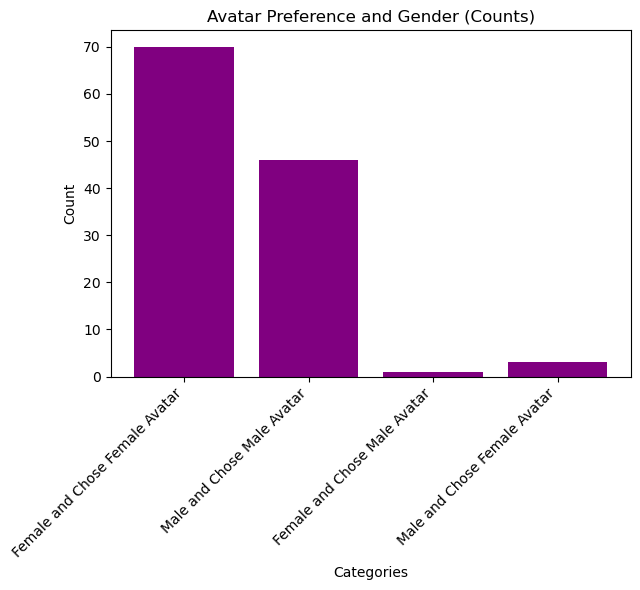

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
file_name = "most.csv"
df = pd.read_csv(file_name)

# Filter the DataFrame for each category
female_female = len(df[(df['Gender'] == 'Female') & (df['Preferred Avatar Gender'] == 'Female')])
male_male = len(df[(df['Gender'] == 'Male') & (df['Preferred Avatar Gender'] == 'Male')])
female_male = len(df[(df['Gender'] == 'Female') & (df['Preferred Avatar Gender'] == 'Male')])
male_female = len(df[(df['Gender'] == 'Male') & (df['Preferred Avatar Gender'] == 'Female')])

# Calculate the total number of participants
total_participants = len(df)

# Display the counts for each category
print("Counts for each category:")
print("Female and Chose Female Avatar:", female_female)
print("Male and Chose Male Avatar:", male_male)
print("Female and Chose Male Avatar:", female_male)
print("Male and Chose Female Avatar:", male_female)

# Calculate percentages for each category
percentage_female_female = (female_female / total_participants) * 100
percentage_male_male = (male_male / total_participants) * 100
percentage_female_male = (female_male / total_participants) * 100
percentage_male_female = (male_female / total_participants) * 100

# Create a bar chart for gender and preferred avatar gender
categories = ['Female and Chose Female Avatar', 'Male and Chose Male Avatar', 'Female and Chose Male Avatar', 'Male and Chose Female Avatar']
counts = [female_female, male_male, female_male, male_female]
percentages = [percentage_female_female, percentage_male_male, percentage_female_male, percentage_male_female]

plt.figure(figsize=(12, 6))

# Subplot for counts
plt.subplot(1, 2, 1)
plt.bar(categories, counts, color='purple')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Avatar Preference and Gender (Counts)')
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

# Most commonly customized, Most time-consuming1.

Step 1: Load Data and Data Preprocessing
The research begins by loading the participants' customization data from a CSV file using the pandas library.
Time columns, representing the duration of customization for each feature, are converted into appropriate data types for further analysis.
A total time column is calculated for each participant, summing up the time spent on all customization features.

Step 2: Identification of Most Time-Consuming Feature.The customization feature on which participants spent the most time is identified by finding the feature with the highest combined time across all participants.
This provides insights into the customization aspect that required the most effort and attention.

Step 3: Sorting Features by Time Consumption
All customization features are ranked based on the total time participants spent on them, from the most time-consuming to the least.This sorting provides a clear picture of how different features are prioritized by participants in terms of customization time.

Step 4: Count of Participants for Each Feature
The number of participants who customized each feature is calculated.
This count indicates the popularity and engagement level of each customization option among participants.

Step 5: Identification of Most Commonly Customized Features
The most commonly customized features are determined by identifying those with the highest number of participants who engaged with them.
This information helps identify the features that most participants found relevant and appealing.

Step 6: Identification of Features Participants Spent Most Time On
For each participant, the customization feature on which they spent the most time is identified.
This insight provides an understanding of participants' individual preferences and priorities in the customization process.



In [5]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
file_path = 'TimespentF.csv'
df = pd.read_csv(file_path)

# Convert time columns to timedelta objects
time_columns = df.columns[1:]  # Exclude 'Id' column
for col in time_columns:
    df[col] = pd.to_timedelta(df[col], errors='coerce')

# Calculate the total time spent on each customization feature
df['TotalTime'] = df[time_columns].sum(axis=1)

# Calculate the feature each participant spent most of their time on
df['MostTimeFeature'] = df[time_columns].idxmax(axis=1)

# Count the number of participants who spent most time on each feature
most_time_feature_counts = df['MostTimeFeature'].value_counts()

# Sort the features based on their total time spent in descending order
sorted_most_time_feature_counts = most_time_feature_counts.sort_values(ascending=False)

# Print the most time-consuming feature
most_time_consuming_feature = sorted_most_time_feature_counts.index[0]
print("Most Time-Consuming Customization Feature:", most_time_consuming_feature)

# Print the features in order from most time-consuming to least time-consuming
print("\nMost Time-Consuming Features to Least Time-Consuming Features:")
print(sorted_most_time_feature_counts)

# Count the number of participants who customized each feature
customization_counts = df[time_columns].applymap(lambda x: 1 if x is not pd.NaT else 0).sum()

# Sort the features based on the number of participants who customized them in descending order
sorted_customization_counts = customization_counts.sort_values(ascending=False)

# Print the most commonly customized features
most_commonly_customized_features = sorted_customization_counts[sorted_customization_counts == sorted_customization_counts.iloc[0]].index
print("\nMost Commonly Customized Features:")
print(most_commonly_customized_features)

# Print the customization counts for each feature
print("\nCustomization Counts:")
print(sorted_customization_counts)

# Find the feature on which most participants spent their most time
most_time_feature = most_time_feature_counts.index[0]
print("\nFeature on Which Most Participants Spent Their Most Time:", most_time_feature)


Most Time-Consuming Customization Feature: Outfit

Most Time-Consuming Features to Least Time-Consuming Features:
Outfit           11
Faceshape         1
Eyewear Color     1
Name: MostTimeFeature, dtype: int64

Most Commonly Customized Features:
Index(['Outfit'], dtype='object')

Customization Counts:
Outfit               13
Hairstyle Type       10
Eyeshape/size         7
EyesMakeup            6
Body type             5
Hairstyle color       5
Eyebrows shape        4
Faceshape             4
Headwear              4
Lips color            3
Face Markings         3
Eyebrows Piercing     3
Complexion            3
Nose size             3
Headwear color        3
Chest Size            3
Jawlines              3
Pose                  2
Nose shape            2
Eyewear Color         2
Eyewear Type          2
Eyebrows color        2
Eye shadow            2
Facial Hair           1
Forehead lines        1
Background            1
Ear Piercing          1
Lips Shape            1
Ears shape            1
H

In [6]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
file_path = 'TimespentS.csv'
df = pd.read_csv(file_path)

# Convert time columns to timedelta objects
time_columns = df.columns[1:]  # Exclude 'Id' column
for col in time_columns:
    df[col] = pd.to_timedelta(df[col], errors='coerce')

# Calculate the total time spent on each customization feature
df['TotalTime'] = df[time_columns].sum(axis=1)

# Calculate the feature each participant spent most of their time on
df['MostTimeFeature'] = df[time_columns].idxmax(axis=1)

# Count the number of participants who spent most time on each feature
most_time_feature_counts = df['MostTimeFeature'].value_counts()

# Sort the features based on their total time spent in descending order
sorted_most_time_feature_counts = most_time_feature_counts.sort_values(ascending=False)

# Print the most time-consuming feature
most_time_consuming_feature = sorted_most_time_feature_counts.index[0]
print("Most Time-Consuming Customization Feature:", most_time_consuming_feature)

# Print the features in order from most time-consuming to least time-consuming
print("\nMost Time-Consuming Features to Least Time-Consuming Features:")
print(sorted_most_time_feature_counts)

# Count the number of participants who customized each feature
customization_counts = df[time_columns].applymap(lambda x: 1 if x is not pd.NaT else 0).sum()

# Sort the features based on the number of participants who customized them in descending order
sorted_customization_counts = customization_counts.sort_values(ascending=False)

# Print the most commonly customized features
most_commonly_customized_features = sorted_customization_counts[sorted_customization_counts == sorted_customization_counts.iloc[0]].index
print("\nMost Commonly Customized Features:")
print(most_commonly_customized_features)

# Print the customization counts for each feature
print("\nCustomization Counts:")
print(sorted_customization_counts)

# Find the feature on which most participants spent their most time
most_time_feature = most_time_feature_counts.index[0]
print("\nFeature on Which Most Participants Spent Their Most Time:", most_time_feature)


Most Time-Consuming Customization Feature: Outfit

Most Time-Consuming Features to Least Time-Consuming Features:
Outfit            10
Hairstyle Type     3
Body type          1
Name: MostTimeFeature, dtype: int64

Most Commonly Customized Features:
Index(['Outfit', 'Hairstyle Type'], dtype='object')

Customization Counts:
Outfit               14
Hairstyle Type       14
Hairstyle color      11
Eyewear Type         10
Ear Piercing          9
Eye color             8
Faceshape             7
Eyebrows shape        7
EyesMakeup            6
Complexion            6
Lips Piercing         5
Chest Size            5
Body type             5
Nose shape            5
Facial Hair           4
Lips Shape            4
Eyebrows color        4
Headwear              4
Nose size             4
Eyeshape/size         4
Face Markings         4
Jawlines              4
Facial Hair Color     4
Eyewear Color         3
Background            3
Lips color            3
Eye spacing           3
Ears shape            2
Hair